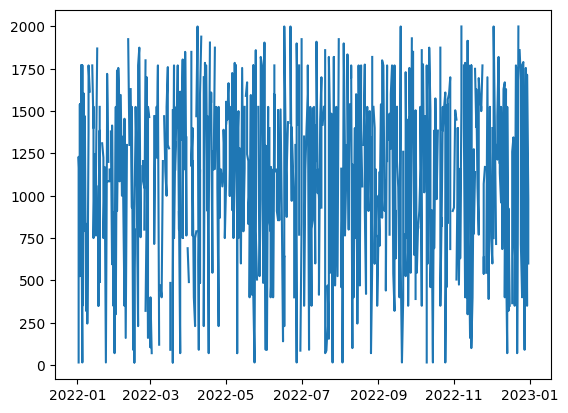

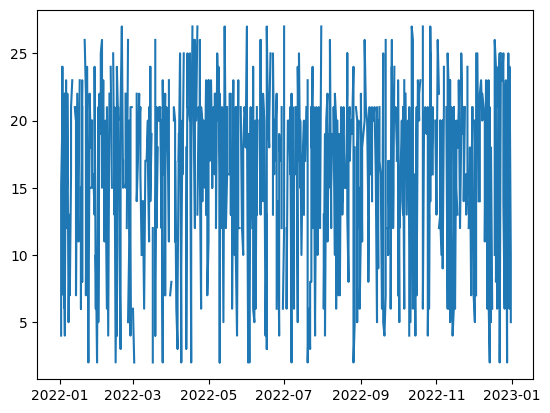

combo-3
meal-6
combo-3


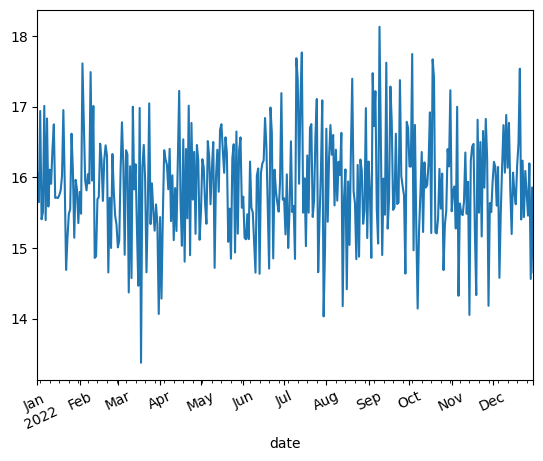

In [1]:
from ToImport.orders import Order
import pandas as pd
import matplotlib.pyplot as plt
import json
data = json.load(open("orders_history.json"))
orders = data["orders"]

#the lists to fill the dataframe
order_id = []
order_accepted = []
order_refused_reason = []
dateoforder = []
items = []
calories = []
price = []

#table1 for the first question and the plots:
df = pd.DataFrame()

#table2 for the last question : 
# columns of meals, first row for prices , second row for how many times it was ordered
df2 = pd.DataFrame()
df2 ["meal-1"] = [5,0]
df2 ["meal-2"] = [7,0] 
df2 ["meal-3"] = [6,0]
df2 ["meal-4"] = [6,0]
df2 ["meal-5"] = [3,0]
df2 ["meal-6"] = [4,0]
df2 ["meal-7"] = [2,0] 
df2 ["meal-8"] = [2,0]
df2 ["combo-1"] = [11,0]
df2 ["combo-2"] = [10,0]
df2 ["combo-3"] = [10,0]



#filling the lists 
for i in orders:
    x = Order(i["items"], i["date"])
    order_id += [x.order_id]
    x.is_order_accepted()
    if x.order_accepted:
        order_accepted += ["Accepted"]
        order_refused_reason += ["None"]
        for item in x.items:
              df2[item][1]+=1
    else:
        order_accepted += ["Refused"]
        order_refused_reason += [x.order_refuse_reason]
    dateoforder += [x.date]
    items += [x.items]
    calories += [x.calories]
    price += [x.price]

#filing the first dataframe 
dateoforder = pd.to_datetime(dateoforder)
df["order_id"] = order_id
df["order_accepted"] = order_accepted
df["order_refused_reason"] = order_refused_reason
df["date" ] = dateoforder
df["items"] = items
df["calories"] = calories
df["price"] = price

#plots
#plot for Total calories per day
plt.plot(df["date"][::50], df["calories"][::50])
plt.show()
#plot for Total earnings per day
plt.plot(df["date"][::50], df["price"][::50])
plt.show()

#plot for Average earnings by customer served per
df.groupby(by = "date")["price"].mean().plot(kind="line", rot= 25)

#Most ordered meal(indexes in df2 for meals are from 0 to 8)
most_ordered_meal = df2.iloc[1,0:8].idxmax()

#Most ordered combo(indexes in df2 for meals are from 8 to 11)
most_ordered_combo = df2.iloc[1,8:11].idxmax()

#the item that got the best earnings (multiplying how many time each item  was ordered by its price)
earnings = 0
for elemnt in df2.columns:
    if df2[elemnt][0]*df2[elemnt][1] > earnings:
        earnings = df2[elemnt][0]*df2[elemnt][1]
        most_money = elemnt

print(most_ordered_combo)
print(most_ordered_meal)
print(most_money)